In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from config import weatherPy_apiKey

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weatherPy_apiKey)

54f6f5bb1a7c4610462289caa0693a66


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create an empty list to store JSON responses
response_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [5]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weatherPy_apiKey + "&q="

In [6]:
# creating dataframe wtih test_cities
test_cities = ['acapulco', 'jamestown', 'dali', 'malatya', 'manila', 'pevek', 'cidreira']
responses = []
city_name = []
latitude = []
temperature = []
humidity = []
clouds = []
wind = []

index = 1
for city in cities:
    weather_data = requests.get(queryUrl + city).json()
    responses.append(weather_data)
    try:
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        temperature.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'Record {index} | {city} found')
        index += 1
    except:
        print(f'Record {index} | **{city} not found**')
        index += 1
        pass

Record 1 | port alfred found
Record 2 | **illoqqortoormiut not found**
Record 3 | labuhan found
Record 4 | imbituba found
Record 5 | asau found
Record 6 | albany found
Record 7 | topolobampo found
Record 8 | grindavik found
Record 9 | kysyl-syr found
Record 10 | hermanus found
Record 11 | yermekeyevo found
Record 12 | padang found
Record 13 | teguldet found
Record 14 | sotouboua found
Record 15 | itoman found
Record 16 | butaritari found
Record 17 | rikitea found
Record 18 | basco found
Record 19 | port hardy found
Record 20 | lima found
Record 21 | elko found
Record 22 | mataura found
Record 23 | **dubenskiy not found**
Record 24 | vaini found
Record 25 | khani found
Record 26 | tuatapere found
Record 27 | bhan found
Record 28 | biskamzha found
Record 29 | **kazalinsk not found**
Record 30 | jumla found
Record 31 | port hedland found
Record 32 | saint-philippe found
Record 33 | atuona found
Record 34 | mangrol found
Record 35 | nanortalik found
Record 36 | chuy found
Record 37 | luau 

Record 289 | nuevo progreso found
Record 290 | omsukchan found
Record 291 | **barentsburg not found**
Record 292 | lagoa found
Record 293 | lavrentiya found
Record 294 | abonnema found
Record 295 | souillac found
Record 296 | beidao found
Record 297 | sterling found
Record 298 | bethel found
Record 299 | half moon bay found
Record 300 | port-gentil found
Record 301 | sitka found
Record 302 | lakes entrance found
Record 303 | mareeba found
Record 304 | tafalla found
Record 305 | **khonuu not found**
Record 306 | williamsburg found
Record 307 | **babanusah not found**
Record 308 | seymchan found
Record 309 | kuching found
Record 310 | den helder found
Record 311 | hofn found
Record 312 | dakar found
Record 313 | caravelas found
Record 314 | belmonte found
Record 315 | **mys shmidta not found**
Record 316 | demba found
Record 317 | boyolangu found
Record 318 | portree found
Record 319 | phan thiet found
Record 320 | kurilsk found
Record 321 | college found
Record 322 | schluchtern found
R

Record 575 | hun found
Record 576 | maceio found
Record 577 | tyukhtet found
Record 578 | fortuna found
Record 579 | **abu jubayhah not found**
Record 580 | chissamba found
Record 581 | kachiry found
Record 582 | diamantino found
Record 583 | tondi found
Record 584 | **boatlaname not found**
Record 585 | celestun found
Record 586 | san quintin found
Record 587 | severnyy found
Record 588 | vilhena found
Record 589 | buxar found
Record 590 | alibag found
Record 591 | barra patuca found
Record 592 | hurghada found
Record 593 | odienne found
Record 594 | fairbanks found
Record 595 | badvel found
Record 596 | **odugathur not found**
Record 597 | wonthaggi found
Record 598 | zhangye found
Record 599 | khovu-aksy found
Record 600 | **ust-kamchatsk not found**
Record 601 | **warqla not found**
Record 602 | erenhot found
Record 603 | requena found
Record 604 | constitucion found
Record 605 | saint george found
Record 606 | rio grande found
Record 607 | gordeyevka found
Record 608 | tharad foun

In [7]:
#print(responses)

In [8]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Latitude': latitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind (MPH)': wind
})

weather_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Port Alfred,-33.5906,290.56,86,63,5.25
1,Labuhan,-6.8844,299.20,84,98,2.55
2,Imbituba,-28.2400,294.15,88,75,4.20
3,Asău,46.4333,275.37,62,97,0.91
4,Albany,42.6001,287.05,21,20,4.63
...,...,...,...,...,...,...
574,Ubari,26.5921,294.96,23,47,3.30
575,Isabela,6.7085,300.15,83,40,1.54
576,Sisimiut,66.9395,266.11,82,35,3.96
577,Uchiza,-8.4592,295.55,94,100,0.34


In [9]:
# function to convert 'Temperature' column from Kelvin to Farenheit
def Kelvin_to_Farenheit(kelvin):
    farenheit = (kelvin-273.15)*(9/5)+32
    return farenheit

In [10]:
weather_df['Temperature'] = Kelvin_to_Farenheit(weather_df['Temperature'])
weather_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Port Alfred,-33.5906,63.338,86,63,5.25
1,Labuhan,-6.8844,78.890,84,98,2.55
2,Imbituba,-28.2400,69.800,88,75,4.20
3,Asău,46.4333,35.996,62,97,0.91
4,Albany,42.6001,57.020,21,20,4.63
...,...,...,...,...,...,...
574,Ubari,26.5921,71.258,23,47,3.30
575,Isabela,6.7085,80.600,83,40,1.54
576,Sisimiut,66.9395,19.328,82,35,3.96
577,Uchiza,-8.4592,72.320,94,100,0.34


In [11]:
weather_df.dtypes

City            object
Latitude       float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind (MPH)     float64
dtype: object

##### Analysis of 'Temperature (Farenheit) v. Latitude'

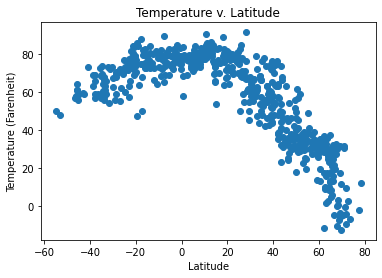

In [12]:
# Scatter Plot - Temperature (Farenheit) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
plt.savefig(f'visualizations/TempLat.png')
plt.show()

##### Analysis of 'Humidity (%) v. Latitude'


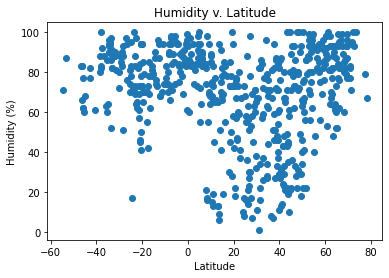

In [13]:
# Scatter Plot - Humidity (%) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(f'visualizations/HumLat.png')
plt.show()

##### Analysis of 'Cloudiness(%) v. Latitude'


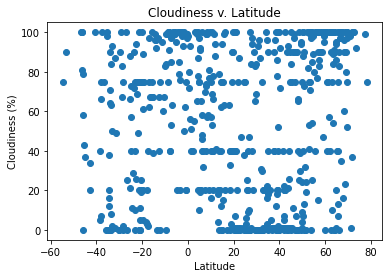

In [14]:
# Scatter Plot - Cloudiness (%) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(f'visualizations/CloudLat.png')
plt.show()

##### Analysis of  'Wind Speed (mph) v. Latitude'


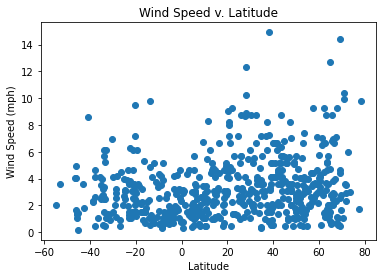

In [15]:
# Scatter Plot - Wind Speed (mph)) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'visualizations/WindLat.png')
plt.show()

### Linear Regressions: Northern Hemisphere v. Southern Hemisphere

In [16]:
# Northern Hemisphere Data Frame
northWeather_df = weather_df.loc[(
    weather_df['Latitude'] >= 0)]
northWeather_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind (MPH)
3,Asău,46.4333,35.996,62,97,0.91
4,Albany,42.6001,57.020,21,20,4.63
5,Topolobampo,25.6000,82.760,36,20,5.14
6,Grindavik,63.8424,26.600,63,0,1.03
7,Kysyl-Syr,63.8986,2.840,90,91,3.57
...,...,...,...,...,...,...
573,Weligama,5.9667,75.254,89,46,3.00
574,Ubari,26.5921,71.258,23,47,3.30
575,Isabela,6.7085,80.600,83,40,1.54
576,Sisimiut,66.9395,19.328,82,35,3.96


In [17]:
# Southern Hemisphere Data Frame
southWeather_df = weather_df.loc[(
    weather_df['Latitude'] < 0)]
southWeather_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Port Alfred,-33.5906,63.338,86,63,5.25
1,Labuhan,-6.8844,78.890,84,98,2.55
2,Imbituba,-28.2400,69.800,88,75,4.20
8,Hermanus,-34.4187,57.002,93,16,3.21
10,Padang,-0.9492,75.200,94,20,1.03
...,...,...,...,...,...,...
562,Payo,-3.7508,71.906,83,85,0.71
565,Grand Gaube,-20.0064,77.000,94,75,1.54
566,Mossamedes,-15.1961,78.206,79,67,2.29
569,Yeppoon,-23.1333,77.000,73,40,3.60


#### Temperature (Farenheit) Linear Regressions

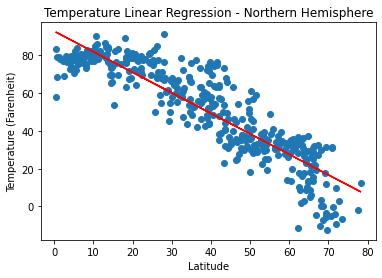

The r-value is: 0.8005625402447781


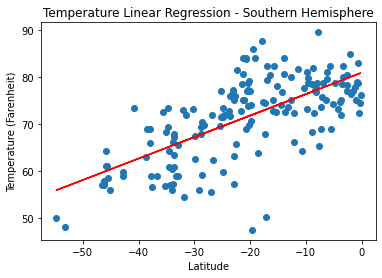

The r-value is: 0.4594311453373387


In [18]:
# Linear Regression - Temperature (Farenheit) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Temperature (Farenheit) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Humidity (%) Linear Regressions

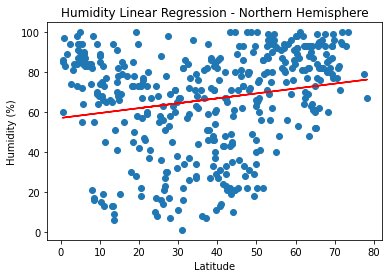

The r-value is: 0.03914455161979024


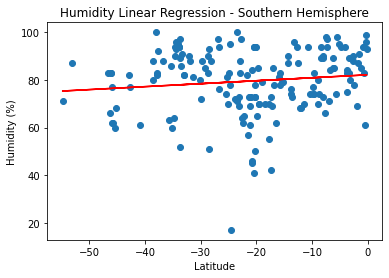

The r-value is: 0.014170601498715326


In [19]:
# Linear Regression - Humidity (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Humidity (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Cloudiness (%) Linear Regression

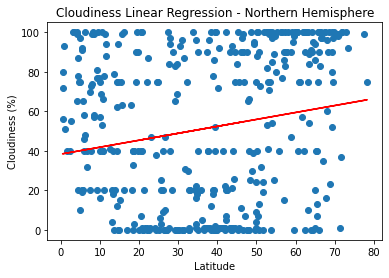

The r-value is: 0.03388844420104733


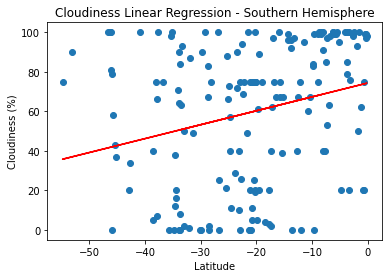

The r-value is: 0.0651410699959556


In [20]:
# Linear Regression - Cloudiness (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Cloudiness (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Wind Speed (mph) Linear Regressions

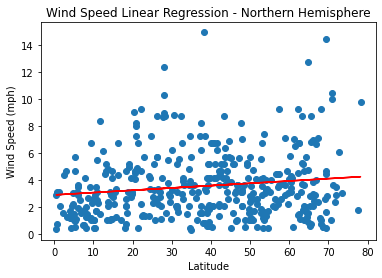

The r-value is: 0.02112522620939425


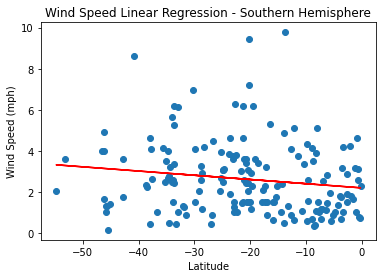

The r-value is: 0.02293882359729239


In [21]:
# Linear Regression - Wind Speed (mph) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Latitude']
y_values = northWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Wind Speed (mph) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Latitude']
y_values = southWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Save Data Frames as CSVs

In [30]:
# Weather Data Frame
weather_df_csv = weather_df.to_csv(index=True)
weatherData_csv = open("data/weather_df.csv", "w", encoding='utf-8')
weatherData_csv.write(weather_df_csv)
weatherData_csv.close()

In [31]:
# Northern Hemisphere - Weather Data Frame
northWeather_df_csv = northWeather_df.to_csv(index=True)
northWeatherData_csv = open("data/northWeather_df.csv", "w", encoding='utf-8')
northWeatherData_csv.write(northWeather_df_csv)
northWeatherData_csv.close()

In [32]:
# Southern Hemisphere - Weather Data Frame
southWeather_df_csv = southWeather_df.to_csv(index=True)
southWeatherData_csv = open("data/southWeather_df.csv", "w", encoding='utf-8')
southWeatherData_csv.write(southWeather_df_csv)
southWeatherData_csv.close()